In [1]:
import graphviz 
import os
import sys
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


from sklearn import tree

import utils

from utils import local_data
from utils import window
from utils import Scale, give_error

%matplotlib inline
warnings.filterwarnings('ignore')

latter_size = 14
plt.rcParams['legend.fontsize'] = latter_size 
plt.rcParams['font.size'] = latter_size 
plt.rcParams['axes.labelsize'] = latter_size
plt.rcParams['xtick.labelsize'] = latter_size
plt.rcParams['ytick.labelsize'] = latter_size

In [2]:
df = pd.read_pickle('./data/sj2_analise.pkl')
df.head()

,vtec,vtec_dt,vtec_dt2,gvtec1,gvtec1_dt,gvtec2,gvtec2_dt,s4
2013-12-01 03:30:00,33.624428,-0.428246,-0.020502,-3.216613,0.002355,1.826065,1.991653,0.163334
2013-12-01 03:40:00,33.205025,-0.546589,-0.118343,-3.122300,0.130198,4.588494,2.530373,0.165397
2013-12-01 03:50:00,32.539631,-0.772594,-0.226005,-2.810556,0.280756,7.786990,2.862830,0.168683
2013-12-01 04:00:00,31.469337,-1.082859,-0.310265,-2.320938,0.399753,10.972091,2.894375,0.173552
2013-12-01 04:10:00,29.995466,-1.429647,-0.346788,-1.764129,0.443303,13.734955,2.621609,0.178917


Delay: -40.000000


(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([0.85761675, 0.85697081, 0.8563799 , 0.85584098, 0.85534467,
        0.85487197, 0.85439588, 0.85388516, 0.85330877, 0.85264124,
        0.85186634, 0.85083194, 0.8497029 , 0.84850963, 0.84728708,
        0.84606337, 0.8448542 , 0.84366243, 0.84248027, 0.84129661,
        0.84010338]),
 <matplotlib.lines.Line2D at 0x7f2684783320>)

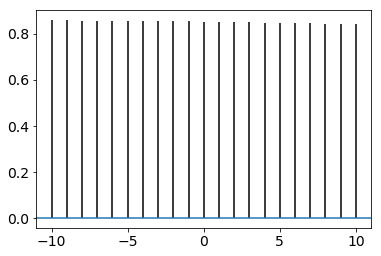

In [21]:
corr = np.correlate(df['vtec'].values.ravel(),df['s4'].values.ravel(), "full");
corr = np.abs(corr);
size_corr = len(df['vtec'].values.ravel()) - 1

# find the max value in terms of location
point = 0
for i in range(0, len(corr)):
    if corr[point] < corr[i]:
        point = i
print('Delay: %f' %(point - size_corr))

plt.xcorr(df['vtec'].values.ravel(),df['s4'].values.ravel())

Delay: 204.000000


(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([-0.02879219, -0.02669329, -0.02466208, -0.02283887, -0.02144695,
        -0.0207491 , -0.02098252, -0.02228648, -0.02464069, -0.02783604,
        -0.03149301, -0.03497478, -0.03795686, -0.04010399, -0.04129957,
        -0.04166127, -0.04148016, -0.04110569, -0.04082329, -0.04077942,
        -0.040976  ]),
 <matplotlib.lines.Line2D at 0x7f2684755d68>)

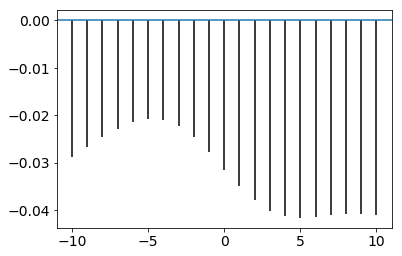

In [22]:
corr = np.correlate(df['vtec_dt'].values.ravel(),df['s4'].values.ravel(), "full");
corr = np.abs(corr);
size_corr = len(df['vtec_dt'].values.ravel()) - 1

# find the max value in terms of location
point = 0
for i in range(0, len(corr)):
    if corr[point] < corr[i]:
        point = i
print('Delay: %f' %(point - size_corr))

plt.xcorr(df['vtec_dt'].values.ravel(),df['s4'].values.ravel())

Delay: -95.000000


(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([ 0.01022799,  0.01012982,  0.0097978 ,  0.00879501,  0.00672854,
         0.00340789, -0.00104203, -0.00614943, -0.01115217, -0.01514996,
        -0.01733946, -0.01721811, -0.01486217, -0.01089587, -0.00636117,
        -0.00238641,  0.00019897,  0.00112282,  0.00068644, -0.00045013,
        -0.00159641]),
 <matplotlib.lines.Line2D at 0x7f26846b6668>)

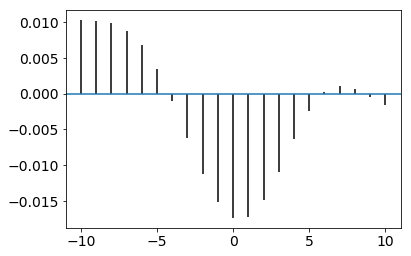

In [23]:
corr = np.correlate(df['vtec_dt2'].values.ravel(),df['s4'].values.ravel(), "full");
corr = np.abs(corr);
size_corr = len(df['vtec_dt2'].values.ravel()) - 1

# find the max value in terms of location
point = 0
for i in range(0, len(corr)):
    if corr[point] < corr[i]:
        point = i
print('Delay: %f' %(point - size_corr))

plt.xcorr(df['vtec_dt2'].values.ravel(),df['s4'].values.ravel())

Delay: 140.000000


(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([-0.22914292, -0.23317951, -0.23741055, -0.24148855, -0.24488159,
        -0.24697744, -0.24724744, -0.24541765, -0.24158142, -0.2362006 ,
        -0.22998166, -0.22353121, -0.21752621, -0.21222043, -0.20754684,
        -0.20322456, -0.19893119, -0.19446165, -0.18980868, -0.18514511,
        -0.1807315 ]),
 <matplotlib.lines.Line2D at 0x7f26846955c0>)

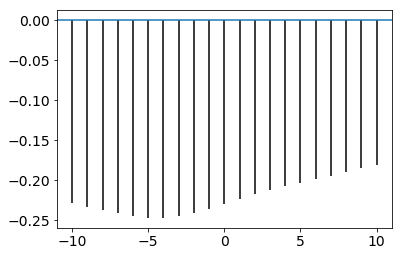

In [24]:
corr = np.correlate(df['gvtec1'].values.ravel(),df['s4'].values.ravel(), "full");
corr = np.abs(corr);
size_corr = len(df['gvtec1'].values.ravel()) - 1

# find the max value in terms of location
point = 0
for i in range(0, len(corr)):
    if corr[point] < corr[i]:
        point = i
print('Delay: %f' %(point - size_corr))

plt.xcorr(df['gvtec1'].values.ravel(),df['s4'].values.ravel())

Delay: 146.000000


(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([-0.02449208, -0.02586995, -0.02608815, -0.02410118, -0.01911993,
        -0.01095191, -0.00021119,  0.01171968,  0.02300955,  0.03189635,
         0.03722355,  0.03891521,  0.03760041,  0.03465201,  0.03154982,
         0.02936873,  0.02847333,  0.02852285,  0.02875266,  0.02837641,
         0.02692534]),
 <matplotlib.lines.Line2D at 0x7f26845f4358>)

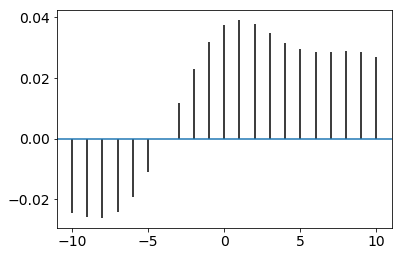

In [25]:
corr = np.correlate(df['gvtec1_dt'].values.ravel(),df['s4'].values.ravel(), "full");
corr = np.abs(corr);
size_corr = len(df['gvtec1_dt'].values.ravel()) - 1

# find the max value in terms of location
point = 0
for i in range(0, len(corr)):
    if corr[point] < corr[i]:
        point = i
print('Delay: %f' %(point - size_corr))

plt.xcorr(df['gvtec1_dt'].values.ravel(),df['s4'].values.ravel())

Delay: -55.000000


(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([0.40758793, 0.40885844, 0.41001791, 0.4110922 , 0.41214775,
        0.41324959, 0.41440935, 0.41554728, 0.41648819, 0.41699823,
        0.41685344, 0.41601765, 0.41441512, 0.41222575, 0.40974917,
        0.40732032, 0.40521664, 0.40359407, 0.40247443, 0.40178254,
        0.4014115 ]),
 <matplotlib.lines.Line2D at 0x7f26845c8940>)

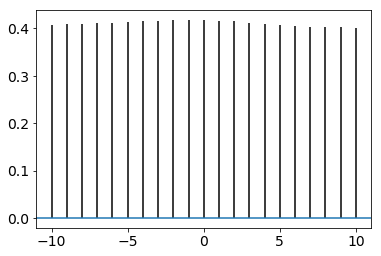

In [26]:
corr = np.correlate(df['gvtec2'].values.ravel(),df['s4'].values.ravel(), "full");
corr = np.abs(corr);
size_corr = len(df['gvtec2'].values.ravel()) - 1

# find the max value in terms of location
point = 0
for i in range(0, len(corr)):
    if corr[point] < corr[i]:
        point = i
print('Delay: %f' %(point - size_corr))

plt.xcorr(df['gvtec2'].values.ravel(),df['s4'].values.ravel())

Delay: -310.000000


(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([ 0.01377949,  0.01333828,  0.01269569,  0.01220454,  0.01205272,
         0.01212516,  0.01197412,  0.01093684,  0.00837993,  0.0039863 ,
        -0.00203267, -0.00889286, -0.01546771, -0.02054916, -0.02325087,
        -0.02327423, -0.02096469, -0.01713712, -0.01274985, -0.00857429,
        -0.00498921]),
 <matplotlib.lines.Line2D at 0x7f2684528320>)

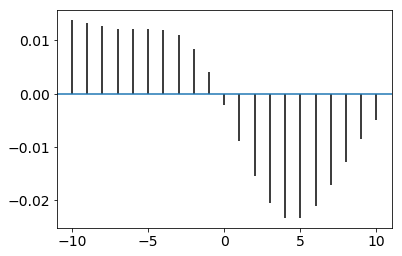

In [27]:
corr = np.correlate(df['gvtec2_dt'].values.ravel(),df['s4'].values.ravel(), "full");
corr = np.abs(corr);
size_corr = len(df['gvtec2_dt'].values.ravel()) - 1

# find the max value in terms of location
point = 0
for i in range(0, len(corr)):
    if corr[point] < corr[i]:
        point = i
print('Delay: %f' %(point - size_corr))

plt.xcorr(df['gvtec2_dt'].values.ravel(),df['s4'].values.ravel())